<a href="https://colab.research.google.com/github/anmolzz-10/Code_Clause_Intern_Projects/blob/Code_Clause_Intern_Project2/Code_Clause_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('employee_data.csv')

In [ ]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [ ]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [ ]:
date_cols = ['recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df['age'] = (df['recorddate_key'] - df['birthdate_key']).dt.days // 365

In [ ]:
df['length_of_employment'] = (df['recorddate_key'] - df['orighiredate_key']).dt.days

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['city_name', 'department_name', 'job_title', 'gender_short', 'gender_full', 'termreason_desc', 'termtype_desc', 'BUSINESS_UNIT']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,length_of_employment
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,53,17,34,9,7,35,1,1,1,1,2006,ACTIVE,0,6334
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,54,18,34,9,7,35,1,1,1,1,2007,ACTIVE,0,6699
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,55,19,34,9,7,35,1,1,1,1,2008,ACTIVE,0,7065
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,56,20,34,9,7,35,1,1,1,1,2009,ACTIVE,0,7430
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,57,21,34,9,7,35,1,1,1,1,2010,ACTIVE,0,7795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,33,7,14,34,1,1,0,0,2015,TERMINATED,1,834
49649,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,34,6,9,44,0,0,2,2,2013,TERMINATED,1,-26
49650,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,38,6,9,39,0,0,0,0,2015,TERMINATED,1,807
49651,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,15,6,9,16,0,0,2,2,2013,TERMINATED,1,53


In [ ]:
status_mapping = {'ACTIVE': 1, 'TERMINATED': 0}
df['STATUS'] = df['STATUS'].map(status_mapping)

In [ ]:
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,length_of_employment
0,1318,2006-12-31,1954-01-03,1989-08-28,1900-01-01,53,17,34,9,7,35,1,1,1,1,2006,1,0,6334
1,1318,2007-12-31,1954-01-03,1989-08-28,1900-01-01,54,18,34,9,7,35,1,1,1,1,2007,1,0,6699
2,1318,2008-12-31,1954-01-03,1989-08-28,1900-01-01,55,19,34,9,7,35,1,1,1,1,2008,1,0,7065
3,1318,2009-12-31,1954-01-03,1989-08-28,1900-01-01,56,20,34,9,7,35,1,1,1,1,2009,1,0,7430
4,1318,2010-12-31,1954-01-03,1989-08-28,1900-01-01,57,21,34,9,7,35,1,1,1,1,2010,1,0,7795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,33,7,14,34,1,1,0,0,2015,0,1,834
49649,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,34,6,9,44,0,0,2,2,2013,0,1,-26
49650,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,38,6,9,39,0,0,0,0,2015,0,1,807
49651,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,15,6,9,16,0,0,2,2,2013,0,1,53


In [ ]:
X = df.drop(['STATUS', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 'terminationdate_key'], axis=1)
Y = df['STATUS']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
val_accuracy = accuracy_score(Y_val, rf_model.predict(X_val))
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 1.0


In [ ]:
test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(rf_model, X, Y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.55351928 1.         1.         1.         0.95438066]
Mean Cross-Validation Accuracy: 0.9015799895411268


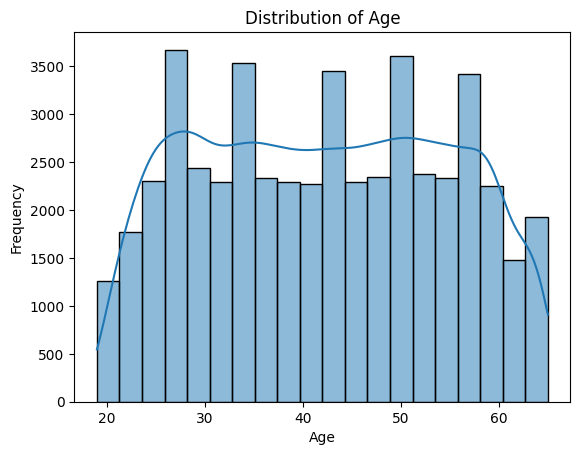

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

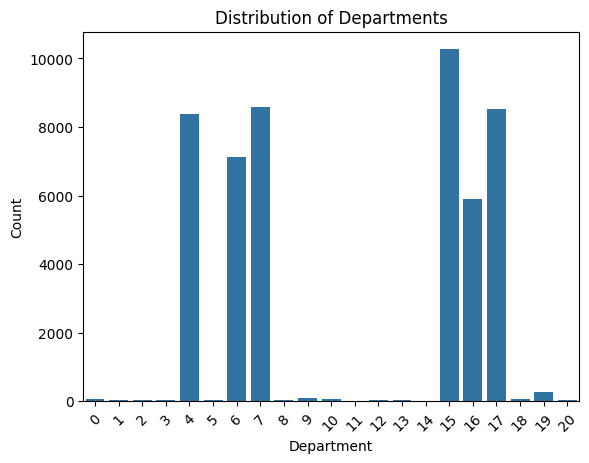

In [ ]:
sns.countplot(data=df, x='department_name')
plt.title('Distribution of Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

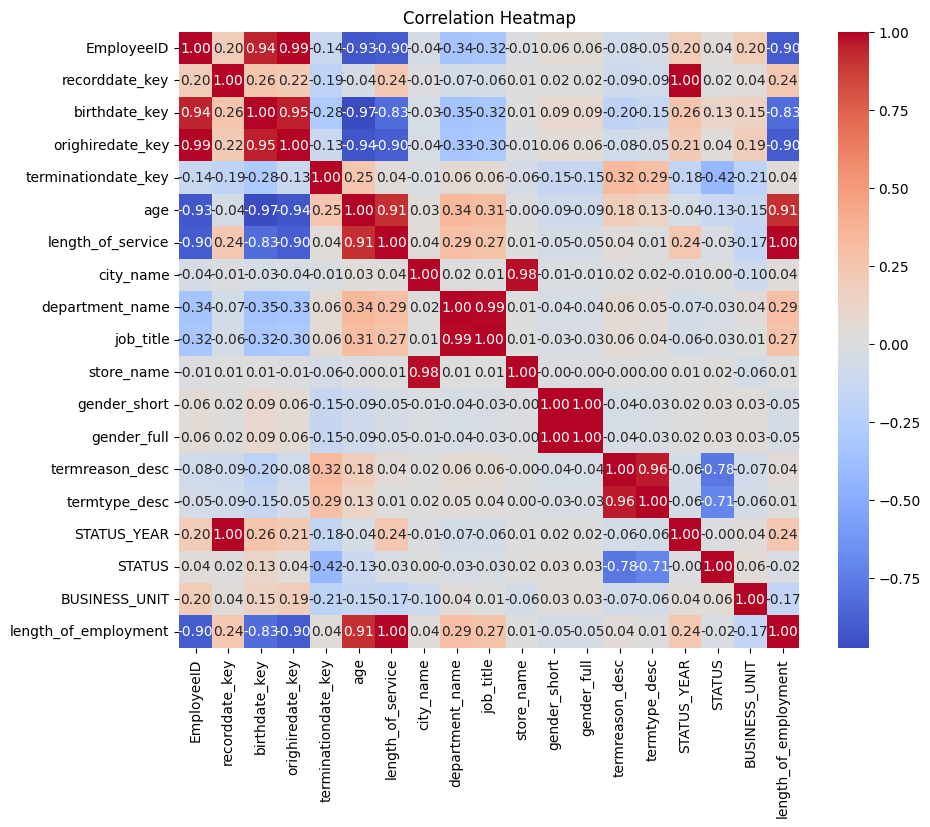

In [ ]:

corr_matrix =df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


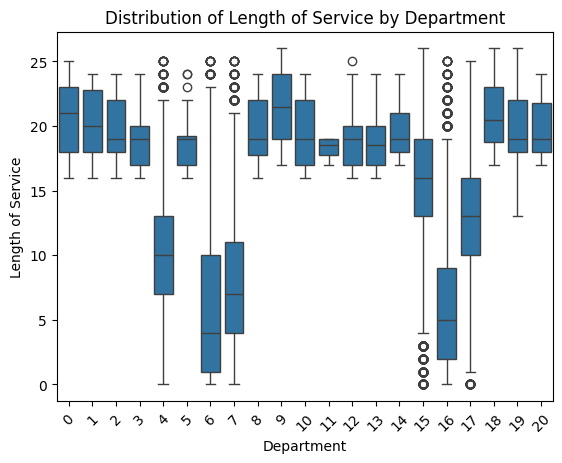

In [ ]:
sns.boxplot(data=df, x='department_name', y='length_of_service')
plt.title('Distribution of Length of Service by Department')
plt.xlabel('Department')
plt.ylabel('Length of Service')
plt.xticks(rotation=45)
plt.show()